# HW2

In [2]:
import numpy as np
from scipy.misc import comb
from astropy.table import Table
from matplotlib import pyplot
%matplotlib inline
import os
from astropy.io import fits
import glob

## Problem 1

### Part a

$N_{tot} = 9$

$N_{R}$ = number of reds

For a given draw the probability of drawing red is:

$P(red) = \frac{N_{R}}{N_{tot}}$


### Part b

Probability of R reds in M draws is 

$P =  {M \choose R} \left(\frac{N_{R}}{N_{tot}}\right) ^{R} \left( \frac{N_{B}}{N_{tot}} \right) ^{M-R}$


### Part c

In [19]:
def calc_prob_data_given_Nr(R, N_tot, prob_draw_red, prob_draw_blue, num_draw_red):
    prob = (comb(N_draws, num_draw_red, exact = True) * 
                (prob_draw_red)**num_draw_red * 
                (prob_draw_blue)**(N_draws - num_draw_red))
    return prob

In [21]:
N_r = np.arange(10)
num_draw_red = 2. #number of red balls drawn
prob = []
N_draws = 6. #Total number of draws
N_tot = 9.  #Total number of balls
for R in N_r:
    prob_draw_red = R/N_tot #Probability of drawing red for any given draw
    prob_draw_blue = 1. - prob_draw_red #probability of drawing blue for any given draw
    prob.append(calc_prob_data_given_Nr(R, N_tot, prob_draw_red, prob_draw_blue, num_draw_red))
prob = np.array(prob)
print(N_r[np.argmax(prob)], 'red balls maximizes the likelihood of drawing 2 red balls in 6 draws')

3 red balls maximizes the likelihood of drawing 2 red balls in 6 draws


### part d

data = R reds in M draws

$P(N_{R}|data) = \frac{P(data|N_{R})*P(N_{R})}{P(data)}$

$P(N_{R}) = \frac{1.}{10.}$

$P(data) = \sum_{N_{R} = 0}^{9} P(data | N_{R}) * P(N_{R})$

$P(data|N_{R})$ was calculated in part c

-------------------
Calculate $P(N_{R})$

In [25]:
P_model = np.ones(10)*1./10.

Calculate $P(data)$

In [29]:
N_r = np.arange(10)
num_draw_red = 2. #number of red balls drawn
P_data_given_model = []
N_draws = 6. #Total number of draws
N_tot = 9.  #Total number of balls

prob_data_given_model = []
for R in N_r:
    prob_draw_red = R/N_tot #Probability of drawing red for any given draw
    prob_draw_blue = 1. - prob_draw_red #probability of drawing blue for any given draw
    P_data_given_model.append(calc_prob_data_given_Nr(R, N_tot, prob_draw_red, prob_draw_blue, num_draw_red))
P_data_given_model = np.array(P_data_given_model)

P_data = np.sum(P_data_given_model * P_model)

Calculate the probability of drawing 2 red balls in 6 draws given Nr red balls for Nr = 0, 9

In [31]:
P_model_given_data = []
for p_data_given_nr, p_model in zip(P_data_given_model, P_model):
    P_model_given_data.append((p_data_given_nr*p_model)/P_data)
P_model_given_data = np.array(P_model_given_data)

Make a nice table to display the output

In [36]:
display_table = Table([N_r, P_model_given_data], names = ['Nr', 'P(Nr|data)'])
display_table

Nr,P(Nr|data)
int64,float64
0,0.0
1,0.0899666139519
2,0.210947109471
3,0.256193990511
4,0.219645053593
5,0.1405728343
6,0.0640484976278
7,0.0172201722017
8,0.001405728343


Check normalization

In [33]:
print(np.sum(P_model_given_data))

1.0


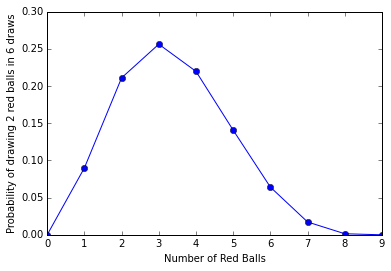

In [38]:
pyplot.plot(N_r, P_model_given_data, 'o-')
pyplot.xlabel('Number of Red Balls')
pyplot.ylabel('Probability of drawing 2 red balls in 6 draws')

### Part e

-------------------
Calculate $P(N_{R})$

In [25]:
P_model = np.ones(10)*1./10.

Calculate $P(data)$

In [39]:
N_r = np.arange(10)
num_draw_red = 20. #number of red balls drawn
P_data_given_model = []
N_draws = 60. #Total number of draws
N_tot = 9.  #Total number of balls

prob_data_given_model = []
for R in N_r:
    prob_draw_red = R/N_tot #Probability of drawing red for any given draw
    prob_draw_blue = 1. - prob_draw_red #probability of drawing blue for any given draw
    P_data_given_model.append(calc_prob_data_given_Nr(R, N_tot, prob_draw_red, prob_draw_blue, num_draw_red))
P_data_given_model = np.array(P_data_given_model)

P_data = np.sum(P_data_given_model * P_model)

Calculate the probability of drawing 20 red balls in 60 draws given Nr red balls for Nr = 0, 9

In [40]:
P_model_given_data = []
for p_data_given_nr, p_model in zip(P_data_given_model, P_model):
    P_model_given_data.append((p_data_given_nr*p_model)/P_data)
P_model_given_data = np.array(P_model_given_data)

Make a nice table to display the output

In [41]:
display_table = Table([N_r, P_model_given_data], names = ['Nr', 'P(Nr|data)'])
display_table

Nr,P(Nr|data)
int64,float64
0,0.0
1,2.09649750829e-05
2,0.105297093782
3,0.735139875875
4,0.15772294256
5,0.00181842172248
6,7.01084018588e-07
7,1.38374319383e-12
8,1.81842172248e-23


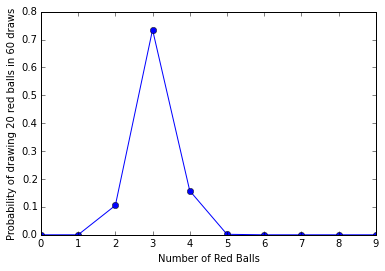

In [43]:
pyplot.plot(N_r, P_model_given_data, 'o-')
pyplot.xlabel('Number of Red Balls')
pyplot.ylabel('Probability of drawing 20 red balls in 60 draws')

## Problem 2

Generate the data

In [94]:
means = np.array([3, 10, 30, 100, 1000])
sample_size = 10000.

samples = []
for m in means:
    samples.append(np.random.poisson(m, sample_size))

### Part a

In [95]:
sigma = np.sqrt(means)

Calculate the number of points with in n standard deviations of the mean

In [96]:
npts = {}
nsigma = [1, 2, 3]
for m, sig, sample in zip(means, sigma, samples):
    npts[m] = []
    for nsig in nsigma:
        npts[m].append(len(sample[(sample < m + nsig*sig) & (sample > m - nsig*sig)]))
    npts[m] = np.array(npts[m])/sample_size * 100.

Make a table to display

In [97]:
display_table_2a = Table([npts[3], npts[10], npts[30], npts[100], npts[1000]], names = means)
display_table_2a

3,10,30,100,1000
float64,float64,float64,float64,float64
62.14,72.96,67.71,66.08,67.94
96.47,96.25,94.43,94.86,95.45
99.61,99.66,99.81,99.66,99.66


### part b

Calculate the number of points needed to include x% of the total sample

In [84]:
npts_68 = sample_size*0.68
npts_95_5 = sample_size*0.954
npts_99_7 = sample_size*0.997

Sort each data set and find upper and lower bound. Assuming equal number of points on either side of the median. Using median because that is the middle point of the sample (centering 68% of points on middle of sample distribution)

In [102]:
lower_bound_one_sig = []
lower_bound_two_sig = []
lower_bound_three_sig = []

upper_bound_one_sig = []
upper_bound_two_sig = []
upper_bound_three_sig = []

for samp in samples:
    sorted_sample = np.sort(samp)
    med = sorted_sample[5000]
    lower_bound_one_sig.append(sorted_sample[5000 - np.ceil(npts_68/2.)])
    upper_bound_one_sig.append(sorted_sample[5000 + np.floor(npts_68/2.)])
    lower_bound_two_sig.append(sorted_sample[5000 - np.ceil(npts_95_5/2.)])
    upper_bound_two_sig.append(sorted_sample[5000 + np.floor(npts_95_5/2.)])
    lower_bound_three_sig.append(sorted_sample[5000 - np.ceil(npts_99_7/2.)])
    upper_bound_three_sig.append(sorted_sample[5000 + np.floor(npts_99_7/2.)])

Compare

In [108]:
compare_table = Table([means, 
                       means-sigma, lower_bound_one_sig, 
                       means+sigma, upper_bound_one_sig, 
                       means-2.*sigma, lower_bound_two_sig, 
                       means + 2.*sigma, upper_bound_two_sig, 
                       means - 3. * sigma, lower_bound_three_sig,
                       means + 3. * sigma, upper_bound_three_sig], 
                     names = ['Mean', 
                              '$\mu-\sigma$', '68% lower', 
                              '$\mu+\sigma$', '68% upper', 
                              '$\mu-2\sigma$', '95.5 lower', 
                              '$\mu+2\sigma$', '95.5% upper', 
                              '$\mu-3\sigma$', '99.7 lower', 
                              '$\mu+3\sigma$', '99.7% upper'])
compare_table

Mean,$\mu-\sigma$,68% lower,$\mu+\sigma$,68% upper,$\mu-2\sigma$,95.5 lower,$\mu+2\sigma$,95.5% upper,$\mu-3\sigma$,99.7 lower,$\mu+3\sigma$,99.7% upper
int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64
3,1.26794919243,1,4.73205080757,5,-0.464101615138,0,6.46410161514,7,-2.19615242271,0,8.19615242271,9
10,6.83772233983,7,13.1622776602,13,3.67544467966,4,16.3245553203,17,0.513167019495,2,19.4868329805,21
30,24.5227744249,24,35.4772255751,36,19.0455488499,20,40.9544511501,42,13.5683232748,15,46.4316767252,47
100,90.0,90,110.0,110,80.0,81,120.0,121,70.0,72,130.0,131
1000,968.377223398,968,1031.6227766,1032,936.754446797,938,1063.2455532,1065,905.131670195,904,1094.86832981,1100


## Problem 3

In [3]:
data_dir = '../data/'
img = fits.getdata(os.path.join(data_dir, '0631_gmos_q2006_i.fits'), 0)

### Part a

In [4]:
print('mean = ', img.mean())
print('standard deviation = ', img.std())

('mean = ', 11952.414)
('standard deviation = ', 9534.626)


### Part b

In [5]:
def sigma_clipping(img, nsigma = 3):
    mask = np.bool_(np.ones(img.shape))
    current_nelem = len(img[mask].flatten())
    new_nelem = 0
    while new_nelem < current_nelem:
        current_nelem = len(img[mask].flatten())
        current_mean = img[mask].mean()
        current_std = img[mask].std()
        mask = (img < current_mean + nsigma*current_std) & (img > current_mean - nsigma*current_std)
        new_nelem = len(img[mask].flatten())

    return current_mean, current_std
    

In [6]:
sigma_clipping(img)

(11158.758, 130.24149)

### part c

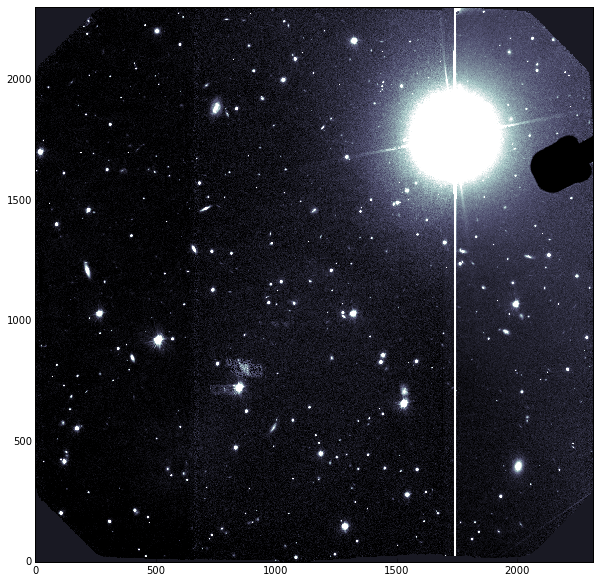

In [7]:
fig = pyplot.figure(figsize = [10, 10])
clipped_mean, clipped_std = sigma_clipping(img)
pyplot.imshow(img, cmap = 'bone', vmin = clipped_mean - clipped_std, vmax = clipped_mean + 10.*clipped_std, interpolation = 'nearest')
pyplot.savefig('gmos_img_prob3c.png')

### part d

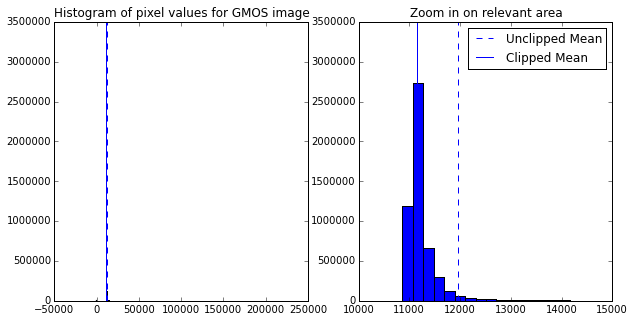

In [8]:
fig = pyplot.figure(figsize = [10, 5])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(img.flatten(), bins = 1000)
ax1.axvline(img.mean(), ls = '--')
ax1.axvline(clipped_mean)
ax2.hist(img.flatten(), bins = 1000)
ax2.axvline(img.mean(), ls = '--', label = 'Unclipped Mean')
ax2.axvline(clipped_mean, label = 'Clipped Mean')
ax2.set_xlim(10000, 15000)
ax1.set_ylim(0, 3500000)
ax2.set_ylim(0, 3500000)
ax2.set_title('Zoom in on relevant area')
ax1.set_title('Histogram of pixel values for GMOS image')
ax2.legend(loc = 'best')

## Problem 4

In [10]:
data_dir = '../data/'
flist = glob.glob(os.path.join(data_dir, 'gemflat*.fits'))

In [16]:
norm_img_list = []
#Normalize the images
for ifile in flist:
    img = fits.getdata(ifile, 0)
    norm_img_list.append(img/np.median(img))

#Make a 3D array
stacked_flat = np.dstack(tuple(norm_img_list))
#Combine the images
flat = np.mean(stacked_flat, axis = 2)

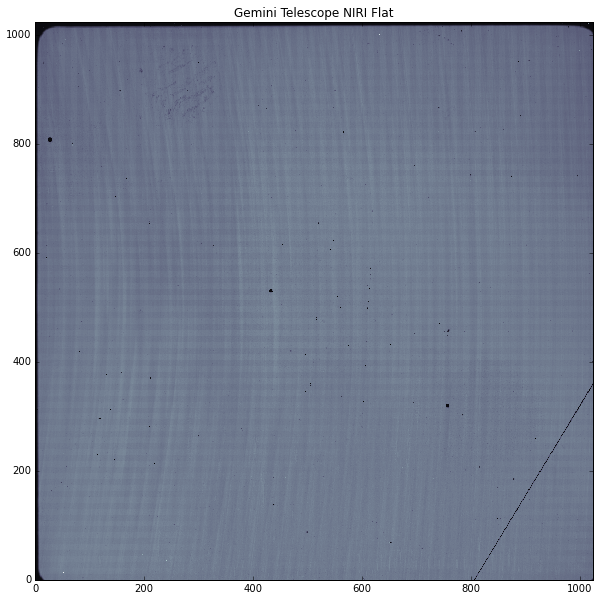

In [18]:
fig = pyplot.figure(figsize = [10, 10])
pyplot.imshow(flat, cmap = 'bone', interpolation = 'nearest')
pyplot.title('Gemini Telescope NIRI Flat')
pyplot.savefig('gem_flat_prob4.png')